# **Laboratorio de Machine Learning**

# ***Modelo de Regresión Lineal para aprendizaje supervisado***

# <font color=blue>**Desafío 03**</font>

* Convencer que tenemos buenos criterios
* Explicacion

Utilizando el dataset de la flor de iris (Iris_missing.csv) construya los modelos de aprendizaje utilizando el modelo de regresión lineal (llamado tambien modelo de regresión lineal simple)

## LIBRERIAS

In [10]:
# ================ librerias Necesarias ================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


## 1 Recoleccion de los datos

In [11]:
data = pd.read_csv('Iris_missing.csv', sep=",")
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# -- Lita de Caracteristicas
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

## 2 Describir los datos

In [13]:
# -- Informacion del dataframe y los tipos de datos de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  146 non-null    float64
 1   sepal-width   146 non-null    float64
 2   petal-length  147 non-null    float64
 3   petal-width   147 non-null    float64
 4   class         148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Estructura Serie
Y = data['class']
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

### 2.1 Variable Class

<AxesSubplot:xlabel='class', ylabel='count'>

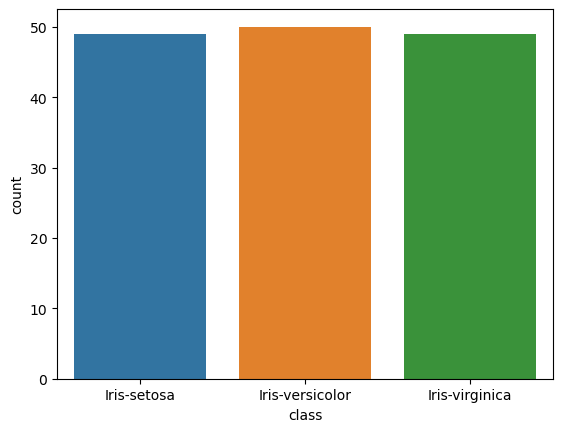

In [15]:
warnings.filterwarnings('ignore')
sns.countplot('class', data=data)

*Comentario: Como se observa el grafico existe igual cantidad de clases de flores*

* verificar si hay datos faltantes
* si hay datos faltas realizar imputacion de datos (opcional)

### 2.2 Variable Sepal

FaceGrid: Esta clase mapea conjunto de datos en varios ejes dispuestos en una cuadricula de filas y columnas

Parametros:
data: DataFrame
row,col,hue: variables que se definen subconjunto de datos

hue: Puede representar niveles de una tercera variable, traza diferentes subcojuntos de datos en diferentes colores



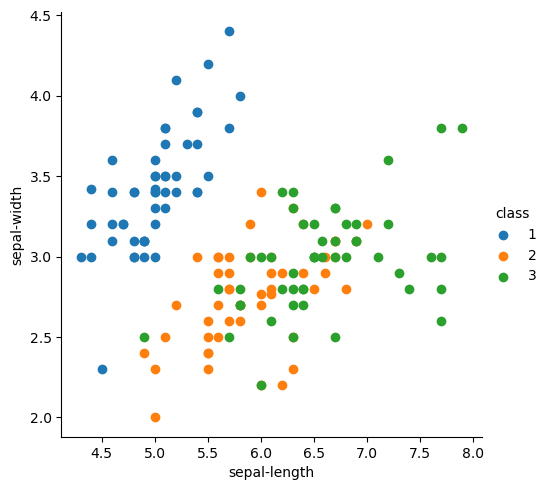

In [55]:
sns.FacetGrid(data, hue='class', size=5)\
    .map(plt.scatter,'sepal-length','sepal-width')\
        .add_legend()

*Como se observa en el grafo de dispersion exite una varianza entre la clase 1 y las 2 y 3 pero estas dos ultimas son casi semejantes o tiene los mismos tamanos desepal*

### 2.3 Variable Petal

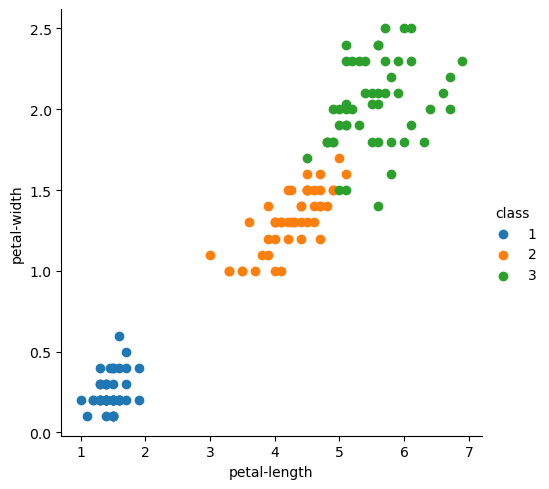

In [51]:
sns.FacetGrid(data=data, hue='class', size=5)\
    .map(plt.scatter,'petal-length','petal-width')\
        .add_legend()

## 3 Pre-Procesamiento de los datos

Verificamos si hay valores faltantes

In [18]:
# Verificando si hay valores faltantes por cada columna 
data.isnull().sum()

sepal-length    4
sepal-width     4
petal-length    3
petal-width     3
class           2
dtype: int64

* *Existen 4 valores faltantes en la columna sepal-length*
* *Existen 4 valores faltantes en la columna sepal-width*
* *Existen 3 valores faltantes en la columna petal-length*
* *Existen 3 valores faltantes en la columna petal-width*
* *Existen 2 valores faltantes en la columna class*

Determinamos la posicion donde se encuentran los valores faltantes

In [19]:
# datos faltantes de class
bool_series = pd.isnull(data["class"])  
data[bool_series]  

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.8,3.1,1.6,0.2,NaN
110,6.5,3.2,5.1,2.0,NaN


In [20]:
# datos faltantes de sepal-length
bool_series = pd.isnull(data["sepal-length"])  
data[bool_series] 

,sepal-length,sepal-width,petal-length,petal-width,class
25,NaN,3.0,1.6,0.2,Iris-setosa
44,NaN,NaN,1.9,0.4,Iris-setosa
129,NaN,3.0,5.8,1.6,Iris-virginica
137,NaN,3.1,5.5,NaN,Iris-virginica


In [21]:
unicos = data['class'].unique()
for clas in unicos:
    print(clas)

Iris-setosa
nan
Iris-versicolor
Iris-virginica


In [22]:
bool_series = pd.isnull(data["sepal-width"])  
data[bool_series] 

,sepal-length,sepal-width,petal-length,petal-width,class
8,4.4,NaN,1.4,0.2,Iris-setosa
44,NaN,NaN,1.9,0.4,Iris-setosa
73,6.1,NaN,4.7,1.2,Iris-versicolor
78,6.0,NaN,NaN,1.5,Iris-versicolor


In [23]:
IrisSetona = data[(data['class'] == 'Iris-setosa')]
IrisSetona[-1:]

,sepal-length,sepal-width,petal-length,petal-width,class
49,5.0,3.3,1.4,0.2,Iris-setosa


In [24]:
IrisSetona = data[(data['class'] == 'Iris-setosa')]
print(IrisSetona[-1:].index)
IrisVersicolor = data[(data['class'] == 'Iris-versicolor')]
print(IrisVersicolor[-1:].index)
IrisVirginica = data[(data['class'] == 'Iris-virginica')]
print(IrisVirginica[-1:].index)

Int64Index([49], dtype='int64')
Int64Index([99], dtype='int64')
Int64Index([149], dtype='int64')


*Los datos se encuentran ordenados respecto a la clase de flor*
* *Los primeros 50 datos (0-49) corresponden a la clase Iris Setona*
* *Los siguientes 50 datos (50-99) corresponden a la clase Iris Versicolor*
* *Los ultimos 50 datos (100-150) corresponden a la clase Iris Virginica*


### Imputacion de datos por separado

Separamos los datos

In [25]:
IrisSetona = data[:50]
IrisVersicolor = data[50:100]
IrisVirginica = data[100:]

In [26]:
# Imputamos las variables numericas con la media
IrisSetona['sepal-length'].fillna(IrisSetona['sepal-length'].mean(), inplace=True)
IrisSetona['sepal-width'].fillna(IrisSetona['sepal-width'].mean(), inplace=True)
IrisSetona['petal-length'].fillna(IrisSetona['petal-length'].mean(), inplace=True)
IrisSetona['petal-width'].fillna(IrisSetona['petal-width'].mean(), inplace=True)

# Imputamos la variables categoricas con la moda
IrisSetona['class'].fillna(IrisSetona['class'].mode()[0], inplace=True)

In [27]:
# Imputamos las variables numericas con la media
IrisVersicolor['sepal-length'].fillna(IrisVersicolor['sepal-length'].mean(), inplace=True)
IrisVersicolor['sepal-width'].fillna(IrisVersicolor['sepal-width'].mean(), inplace=True)
IrisVersicolor['petal-length'].fillna(IrisVersicolor['petal-length'].mean(), inplace=True)
IrisVersicolor['petal-width'].fillna(IrisVersicolor['petal-width'].mean(), inplace=True)

# Imputamos la variables categoricas con la moda
IrisVersicolor['class'].fillna(IrisVersicolor['class'].mode()[0], inplace=True)

In [28]:
# Imputamos las variables numericas con la media
IrisVirginica['sepal-length'].fillna(IrisVirginica['sepal-length'].mean(), inplace=True)
IrisVirginica['sepal-width'].fillna(IrisVirginica['sepal-width'].mean(), inplace=True)
IrisVirginica['petal-length'].fillna(IrisVirginica['petal-length'].mean(), inplace=True)
IrisVirginica['petal-width'].fillna(IrisVirginica['petal-width'].mean(), inplace=True)

# Imputamos la variables categoricas con la moda
IrisVirginica['class'].fillna(IrisVirginica['class'].mode()[0], inplace=True)


# Juntamos los datos

In [29]:
data = pd.concat([IrisSetona,IrisVersicolor,IrisVirginica], axis=0)
data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.200000,Iris-setosa
1,4.9,3.0,1.4,0.200000,Iris-setosa
2,4.7,3.2,1.3,0.200000,Iris-setosa
3,4.6,3.1,1.5,0.200000,Iris-setosa
4,5.0,3.6,1.4,0.200000,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.300000,Iris-virginica
146,6.3,2.5,5.0,1.900000,Iris-virginica
147,6.5,3.0,5.2,2.000000,Iris-virginica
148,6.2,3.4,5.4,2.300000,Iris-virginica


In [30]:
data.iloc[[30,110]]

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.8,3.1,1.6,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica


separamos  los datos

In [31]:
IrisSetona = data[(data['class'] == 'Iris-setosa')]
IrisSetona.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.00000
mean,5.004167,3.420833,1.463265,0.24400
std,0.352228,0.369754,0.173433,0.10721
min,4.300000,2.300000,1.000000,0.10000
25%,4.800000,3.200000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.200000,3.600000,1.575000,0.30000
max,5.800000,4.400000,1.900000,0.60000


In [32]:
IrisVersicolor = data[(data['class'] == 'Iris-versicolor')]
IrisVersicolor.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.766667,4.256250,1.326000
std,0.516171,0.313202,0.468565,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [33]:
IrisVirginica = data[(data['class'] == 'Iris-virginica')]
IrisVirginica.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.000000
mean,6.579167,2.974000,5.552000,2.031915
std,0.629207,0.322497,0.551895,0.269623
min,4.900000,2.200000,4.500000,1.400000
25%,6.225000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.550000,2.015957
75%,6.900000,3.175000,5.875000,2.300000
max,7.900000,3.800000,6.900000,2.500000


## Cuadro Comparativo 
De la descripcion de los datos por cada clase de Flor 

In [34]:
IrisVersicolor.mean()

sepal-length    5.936000
sepal-width     2.766667
petal-length    4.256250
petal-width     1.326000
dtype: float64

In [35]:
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
data["class"]= data["class"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  150 non-null    float64 
 1   sepal-width   150 non-null    float64 
 2   petal-length  150 non-null    float64 
 3   petal-width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# <font color=blue>**Parte 1**</font>

La columna <font color=red>class</font> (llamada tambien etiquetas) son categorias no numéricas.

Sabiendo que el <font color=red>modelo de regresión lineal</font> trabaja sólo con valores numéricos, haga la conversión correspondiente.

* Solo regresion lineal simple
* Usar una estrategia la que queramos

Cambiamos las categorias de las clases de flores de forma manual
debido a que emplenado la codificacion One-Hot no podriamos ajustarlo a nuestro modelo de regresion lineal simple 

In [38]:
# ....
new_class = {'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}
data['class'].replace(new_class, inplace = True)
data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.200000,1
1,4.9,3.0,1.4,0.200000,1
2,4.7,3.2,1.3,0.200000,1
3,4.6,3.1,1.5,0.200000,1
4,5.0,3.6,1.4,0.200000,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.300000,3
146,6.3,2.5,5.0,1.900000,3
147,6.5,3.0,5.2,2.000000,3
148,6.2,3.4,5.4,2.300000,3


# <font color=blue>**Parte 2**</font>

1.   Tome los valores de: 

  X -> sepal-width

  y -> class
2.   Haga la partición de datos en: entrenamiento y test con valores por defecto.

1.   Obtenga el modelo de aprendizaje correspondiente.

2.   Grafique los datos originales y la recta (modelo) obtenido.

4.   Calcule el error cuadratico medio y explique sus resultados.






In [39]:
# librerias necesarias
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
X = data[['sepal-width']]
y = data['class']

In [41]:
# separa los datos para entrenamiento y para prueba de forma aleatorio al azar
# tamaño de prueba es el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y) #20%


In [42]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) 

LinearRegression()

In [43]:
# prediccion con los datos de entrenamiento
y_train_predicted = linear_regression.predict(X_train) 
# prediccion con los datos de prueba
y_test_predicted = linear_regression.predict(X_test)   

# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
# error cuadratico medio
# calidad obtenida en el conjunto de datos de prueba
test_MSD = mean_squared_error(y_test, y_test_predicted)

print(train_MSD)
print(test_MSD)

0.5442911865275397
0.5648789520214074


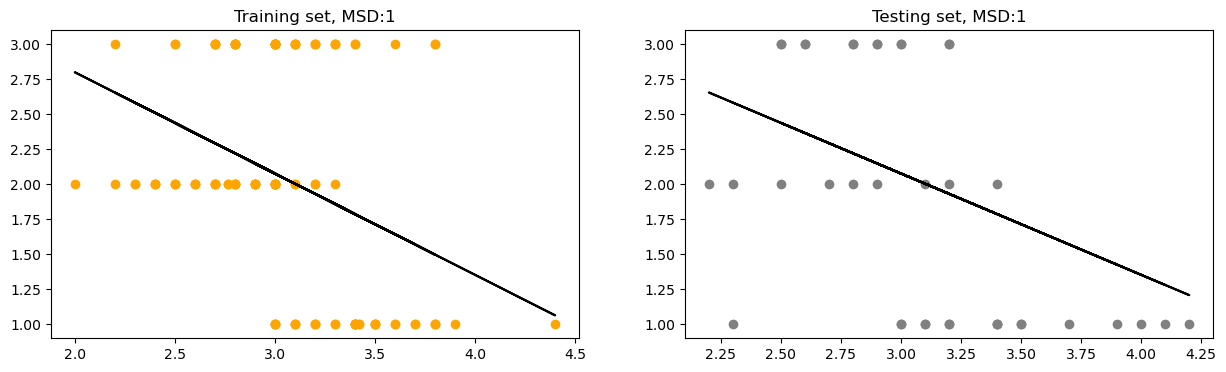

In [44]:
# graficas de datos del entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

# <font color=blue>**Parte 3**</font>



1.   Tome los valores de:

  X -> petal-length

  y -> class
2.   Haga la partición de datos en:

  Datos de entrenamiento 80% y

  Datos de prueba 20%.

1.   Obtenga el modelo de aprendizaje correspondiente.
2.   Grafique los datos originales y la recta (modelo) obtenido.

1.   Calcule el error cuadratico medio y explique sus resultados.







In [45]:
X = data[['petal-length']]
y = data['class']

In [46]:
# separa los datos para entrenamiento y para prueba de forma aleatorio al azar
# tamaño de prueba es el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y) #20%


In [47]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) 

LinearRegression()

In [48]:
# prediccion con los datos de entrenamiento
y_train_predicted = linear_regression.predict(X_train) 
# prediccion con los datos de prueba
y_test_predicted = linear_regression.predict(X_test)   

# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
# error cuadratico medio
# calidad obtenida en el conjunto de datos de prueba
test_MSD = mean_squared_error(y_test, y_test_predicted)

print(train_MSD)
print(test_MSD)

0.0673956657809551
0.06215904096341442


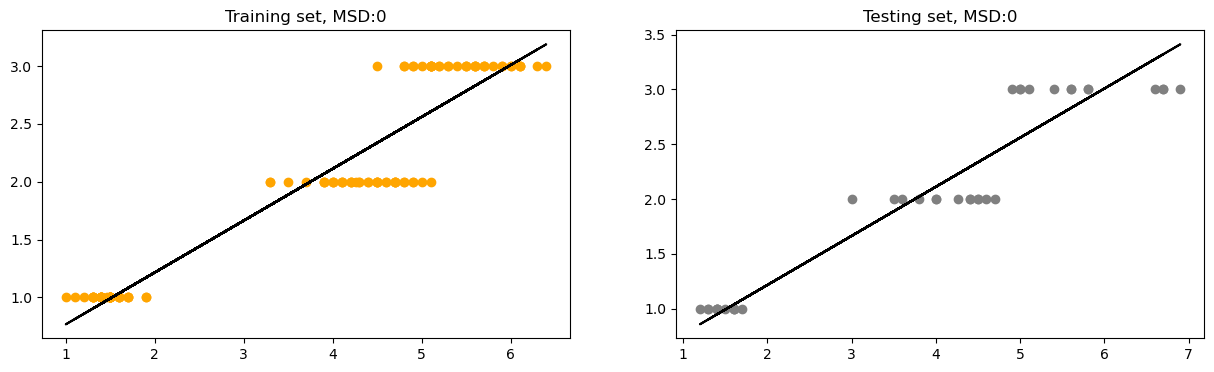

In [49]:
# graficas de datos del entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

# <font color=blue>**Parte 4**</font>

Observando los resultados de la <font color=blue>Parte 2</font> y <font color=blue>Parte 3</font>, qué puede concluir?

In [50]:
# escriba i/o explique sus conclusiones en día de la sustentación/defensa del desafío
# ....


# <font color=blue> Bibliografia </font>
